In [73]:
# All the packages needed 
import glob2
import os
import matplotlib.pyplot as plt 
from matplotlib import rc
from tqdm import tqdm
from scipy.fftpack import fft
import numpy as np

In [74]:
# Acquiring all the file list to extract data from

fileDir = "/home/srj_bruh/Acads/nematics_project/data/job2502694/"

listFiles = glob2.glob(fileDir+"dir"+"*.dat")
numOnlyListFiles = []

for i in tqdm(listFiles):
    numOnlyListFiles.append(int(i[len(fileDir+"dir"):-4]))
numOnlyListFiles.sort()

listFiles = []

for i in numOnlyListFiles:
    listFiles.append(fileDir+"dir"+str(i)+".dat")

100%|██████████| 141/141 [00:00<00:00, 83838.51it/s]


In [75]:
# Initialization of the fourier transform field and the function to determine

nx = 400
ny = 400

# Number of samplepoints
N = nx
# sample spacing
T = 1.0

xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
xf = 2*np.pi*xf
xf = xf[1:]

time_axis = np.linspace(0,len(numOnlyListFiles),len(numOnlyListFiles))

def get_qSpectrum(dataFile):
    yf = fft(dataFile)
    return 2.0/N * np.abs(yf[1:N//2])

/home/srj_bruh/anaconda3/envs/thampipaper/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


In [93]:
# Fourier transforming the entire domain and averaging it out 

time_q_data = []

for i in tqdm(listFiles):
    dataFile = [] 
    with open(i,"r") as f:
        data = f.readlines()
        for line in data:
            words = line.split()
            dataFile.append(float(words[3])*10**-5)
            
    q_total = np.zeros((N//2-1,))
    
    for j in range(ny):
        data_segment = dataFile[j*nx:(j+1)*nx] 
        q_spectrum = get_qSpectrum(data_segment)
        q_total = q_total+ q_spectrum  
    
    q_total = q_total
#     q_total = q_total / np.linalg.norm(q_total)
    time_q_data.append(q_total)

time_q_data = np.array(time_q_data)

100%|██████████| 141/141 [00:15<00:00,  8.87it/s]


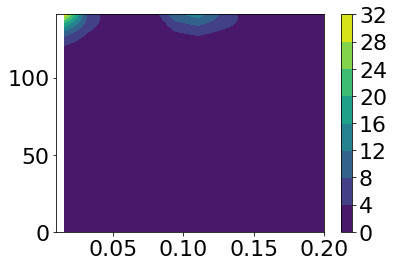

In [94]:
# Plotting of the q_spectrum

plt.contourf(xf,time_axis,time_q_data)
plt.rcParams.update({'font.size': 22})
rc('xtick', labelsize=22)
rc('ytick', labelsize=22)
plt.xlim(0.01,0.2)
plt.colorbar()

In [92]:
time_q_data[0]

array([6.76613170e-09, 7.19303813e-09, 8.01915714e-09, 9.50019064e-09,
       1.23140981e-08, 1.88179846e-08, 4.61818769e-08, 7.89565053e-08,
       2.02945714e-08, 1.14042331e-08, 7.84404427e-09, 5.94076891e-09,
       4.76400114e-09, 3.96861429e-09, 3.39708634e-09, 2.96770115e-09,
       2.63464088e-09, 2.36888113e-09, 2.15261021e-09, 1.97281330e-09,
       1.82138710e-09, 1.69257763e-09, 1.58081739e-09, 1.48360378e-09,
       1.39811484e-09, 1.32250349e-09, 1.25472263e-09, 1.19434922e-09,
       1.14011154e-09, 1.09047621e-09, 1.04447416e-09, 1.00301329e-09,
       9.65715404e-10, 9.30255182e-10, 8.98260216e-10, 8.68151476e-10,
       8.40142732e-10, 8.14005510e-10, 7.89539893e-10, 7.66689247e-10,
       7.45160002e-10, 7.25252002e-10, 7.06039823e-10, 6.88465097e-10,
       6.71542652e-10, 6.55727574e-10, 6.40124782e-10, 6.25935760e-10,
       6.11775525e-10, 5.98579491e-10, 5.86219932e-10, 5.74367271e-10,
       5.63057763e-10, 5.51861724e-10, 5.41507968e-10, 5.31167574e-10,
      